In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

When we look at the data, we realize that the target columns are actually stored in a separate file. To fix this, we can just merge the two since they share ids into one dataframe. We will combine functional with functional needs to repairs so this will be a binary problem as opposed to a ternary one.

In [41]:
df_labels = pd.read_csv('../data/training_set_labels.csv', header=0)
df_labels.replace({'functional needs repair': 'functional'}, inplace=True)
df_labels['status_group'].value_counts(normalize=True)

functional        0.615758
non functional    0.384242
Name: status_group, dtype: float64

In [42]:
df_values = pd.read_csv('../data/training_set_values.csv', header=0)
df_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


Since the data is stored in two separate csv, we will combine them into one. Then we'll combine the target columns with the dataframes.

In [43]:
df_val_test = pd.read_csv('../data/test_set.csv', header=0)
df_val_test
df_values = pd.concat([df_values, df_val_test], ignore_index=True)
df_values = df_values.merge(df_labels, left_on='id', right_on='id')

In [44]:
df_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


There are a lot of columns with non numerical entries. This means we might have to one hot encode them, however with how many columns and distinct entries there are, it might be too many factors. We will likely need to drop some of these columns. First lets plot of graphs with only the numeric columns

We also should take a sample of the data for this graphing since there is a lot of data and it would take a long time to graph each time.

In [45]:
df_numeric = df_values.select_dtypes(include=np.number).merge(df_labels, left_on='id', right_on='id')
#Take a sample of a quarter of the data, random state for reproducability
df_num_sample = df_numeric.sample(frac=0.10, random_state= 5)
df_num_sample.drop(columns=['id'], inplace=True)

# TEMPORARILY COMMENTED OUT SO PROGRAM DOES NOT STALL EACH TIME 
# sns.pairplot(hue = 'status_group', data= df_num_sample)

# Baseline Model
With just the numerical categories, there does not seem to be any columns that do a particularly good job at correlating to a well being either function or non functional. \
What we'll do for now is just to create a baseline model without any preprocessing to see what the accuracy score will be.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
#Drop the id column now that we don't need it
df_values.drop(columns=['id'], inplace=True)
df_values['status_group'].replace({'functional': 1, 'non functional': 0}, inplace=True)

X = df_numeric.drop(columns=['status_group'])
y = df_values['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6174410774410775

In [47]:
df_values['status_group'].value_counts()

1    36576
0    22824
Name: status_group, dtype: int64

Without any preproccessing done, the model does a pretty bad job at predicting the results, with a large amount of false positives and a not so small false negative as well.

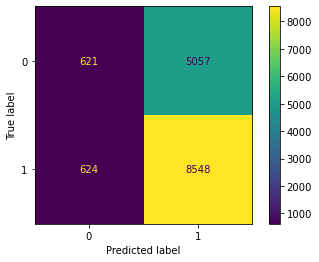

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Next, we'll try to look at the coeeficients to see which columns have a high correlation.

In [50]:
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficients': coefficients, 'Odds Ratios': odds_ratios})
feature_importance

,Feature,Coefficients,Odds Ratios
0,id,0.000002,1.000002
1,amount_tsh,0.000267,1.000267
2,gps_height,0.000386,1.000386
3,longitude,0.010821,1.010879
4,latitude,-0.000632,0.999368
5,num_private,0.000817,1.000818
6,region_code,-0.006937,0.993087
7,district_code,-0.000543,0.999457
8,population,0.000102,1.000102
9,construction_year,-0.000157,0.999843


Here we can see that most of the numerical data has a negative coefficient, aside from longitude, num private, region code, and construction year, most of which have a near 0 coefficient.   
We'll also look at the categorical columns and see if we can drop any that are not particularly useful.  

In [51]:
df_values['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [52]:
#A fair amount of these columns are essentially duplicates, have the same data as other columns or similar
#PUT BACK water_quality, management, source, district_code, extraction_type
non_important_columns = ['wpt_name', 'region_code', 'subvillage', 'extraction_type','payment', 'quantity', 'waterpoint_type', 'source_type', 'scheme_name', 'lga', 'ward']
prep_df_values = df_values.drop(columns=non_important_columns)
prep_df_values

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,management,management_group,payment_type,water_quality,quality_group,quantity_group,source,source_class,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,...,vwc,user-group,annually,soft,good,enough,spring,groundwater,communal standpipe,1
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,...,wug,user-group,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,1
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,...,vwc,user-group,per bucket,soft,good,enough,dam,surface,communal standpipe,1
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,...,vwc,user-group,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe,0
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,...,other,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,...,water board,user-group,per bucket,soft,good,enough,spring,groundwater,communal standpipe,1
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,...,vwc,user-group,annually,soft,good,enough,river,surface,communal standpipe,1
59397,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,0,Rufiji,Mbeya,...,vwc,user-group,monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,1
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,...,vwc,user-group,never pay,soft,good,insufficient,shallow well,groundwater,hand pump,1


We can also combine date_recorded with construction year by subtracting the two and storing them as a year

In [53]:
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
prep_df_values['date_recorded'] = prep_df_values['date_recorded'].apply(lambda row :row[:4])
prep_df_values['years_active'] = prep_df_values['date_recorded'].astype(int) - prep_df_values['construction_year'].astype(int)

#Convert years with 0 as construction year to simply 0
prep_df_values['years_active'] = prep_df_values['years_active'].apply(lambda year: year if year < 100 else np.nan)
#TEMP TRYING
prep_df_values[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population']] = prep_df_values[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population']].replace(0, np.nan)
prep_df_values.replace('unknown', np.nan)
#Now drop the two other columns
prep_df_values.drop(columns=['date_recorded', 'construction_year'], inplace=True)

prep_df_values

,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,district_code,...,management_group,payment_type,water_quality,quality_group,quantity_group,source,source_class,waterpoint_type_group,status_group,years_active
0,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,5,...,user-group,annually,soft,good,enough,spring,groundwater,communal standpipe,1,12.0
1,NaN,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,2,...,user-group,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,1,3.0
2,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,0,Pangani,Manyara,4,...,user-group,per bucket,soft,good,enough,dam,surface,communal standpipe,1,4.0
3,NaN,Unicef,263.0,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,63,...,user-group,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe,0,27.0
4,NaN,Action In A,NaN,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,1,...,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Germany Republi,1210.0,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,5,...,user-group,per bucket,soft,good,enough,spring,groundwater,communal standpipe,1,14.0
59396,4700.0,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,4,...,user-group,annually,soft,good,enough,river,surface,communal standpipe,1,15.0
59397,NaN,NaN,NaN,NaN,34.017087,-8.750434,0,Rufiji,Mbeya,7,...,user-group,monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,1,NaN
59398,NaN,Malec,NaN,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,4,...,user-group,never pay,soft,good,insufficient,shallow well,groundwater,hand pump,1,NaN


Here we will create a dataframe for specifically the categorical columns

In [54]:
df_categoricals = prep_df_values.select_dtypes(exclude=np.number)
df_categoricals

,funder,installer,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type_group,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity_group,source,source_class,waterpoint_type_group
0,Roman,Roman,Lake Nyasa,Iringa,True,GeoData Consultants Ltd,VWC,False,gravity,gravity,vwc,user-group,annually,soft,good,enough,spring,groundwater,communal standpipe
1,Grumeti,GRUMETI,Lake Victoria,Mara,NaN,GeoData Consultants Ltd,Other,True,gravity,gravity,wug,user-group,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe
2,Lottery Club,World vision,Pangani,Manyara,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,vwc,user-group,per bucket,soft,good,enough,dam,surface,communal standpipe
3,Unicef,UNICEF,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,True,submersible,submersible,vwc,user-group,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe
4,Action In A,Artisan,Lake Victoria,Kagera,True,GeoData Consultants Ltd,NaN,True,gravity,gravity,other,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Pangani,Kilimanjaro,True,GeoData Consultants Ltd,Water Board,True,gravity,gravity,water board,user-group,per bucket,soft,good,enough,spring,groundwater,communal standpipe
59396,Cefa-njombe,Cefa,Rufiji,Iringa,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,vwc,user-group,annually,soft,good,enough,river,surface,communal standpipe
59397,NaN,NaN,Rufiji,Mbeya,True,GeoData Consultants Ltd,VWC,False,swn 80,handpump,vwc,user-group,monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump
59398,Malec,Musa,Rufiji,Dodoma,True,GeoData Consultants Ltd,VWC,True,nira/tanira,handpump,vwc,user-group,never pay,soft,good,insufficient,shallow well,groundwater,hand pump


# Building up Logistic Regression Model
Now is the time to one hot encode the categorical columns to see if there is a correlation. For any columns that end up being encoded into hundreds or even thousands of columns, they aren't worth considering.

In [55]:
y = prep_df_values['status_group']
X = prep_df_values[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'years_active', 'district_code',
                     'basin', 'region', 'management_group', 'quality_group', 'permit', 'water_quality', 'management', 'source', 'extraction_type_class', 'extraction_type_group', 
                     'waterpoint_type_group', 'quantity_group', 'payment_type']]
X

,amount_tsh,gps_height,longitude,latitude,num_private,population,years_active,district_code,basin,region,...,quality_group,permit,water_quality,management,source,extraction_type_class,extraction_type_group,waterpoint_type_group,quantity_group,payment_type
0,6000.0,1390.0,34.938093,-9.856322,0,109.0,12.0,5,Lake Nyasa,Iringa,...,good,False,soft,vwc,spring,gravity,gravity,communal standpipe,enough,annually
1,NaN,1399.0,34.698766,-2.147466,0,280.0,3.0,2,Lake Victoria,Mara,...,good,True,soft,wug,rainwater harvesting,gravity,gravity,communal standpipe,insufficient,never pay
2,25.0,686.0,37.460664,-3.821329,0,250.0,4.0,4,Pangani,Manyara,...,good,True,soft,vwc,dam,gravity,gravity,communal standpipe,enough,per bucket
3,NaN,263.0,38.486161,-11.155298,0,58.0,27.0,63,Ruvuma / Southern Coast,Mtwara,...,good,True,soft,vwc,machine dbh,submersible,submersible,communal standpipe,dry,never pay
4,NaN,NaN,31.130847,-1.825359,0,NaN,NaN,1,Lake Victoria,Kagera,...,good,True,soft,other,rainwater harvesting,gravity,gravity,communal standpipe,seasonal,never pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.0,37.169807,-3.253847,0,125.0,14.0,5,Pangani,Kilimanjaro,...,good,True,soft,water board,spring,gravity,gravity,communal standpipe,enough,per bucket
59396,4700.0,1212.0,35.249991,-9.070629,0,56.0,15.0,4,Rufiji,Iringa,...,good,True,soft,vwc,river,gravity,gravity,communal standpipe,enough,annually
59397,NaN,NaN,34.017087,-8.750434,0,NaN,NaN,7,Rufiji,Mbeya,...,fluoride,False,fluoride,vwc,machine dbh,handpump,swn 80,hand pump,enough,monthly
59398,NaN,NaN,35.861315,-6.378573,0,NaN,NaN,4,Rufiji,Dodoma,...,good,True,soft,vwc,shallow well,handpump,nira/tanira,hand pump,insufficient,never pay


Here we see that with the new relevant numerical columns and the one hot encoded columns that are worth exploring, we actually increased our accuracy metric to 78 from around 65.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=41)

num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')
#Impute numeric and categorical columns for train and test set
X_train_num = X_train[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population' ,'years_active', 'district_code']]
X_train_cat = X_train[['basin', 'region' , 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group' ,'payment_type', 'water_quality', 'management', 'source', 'extraction_type_group', 'extraction_type_class']]
X_test_num = X_test[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population' ,'years_active', 'district_code']]
X_test_cat = X_test[['basin', 'region' , 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group' ,'payment_type', 'water_quality', 'management', 'source', 'extraction_type_group', 'extraction_type_class']]


#Fit transform for train, transform test
num_arr = num_imp.fit_transform(X_train_num)
cat_arr = cat_imp.fit_transform(X_train_cat)
num_t_arr = num_imp.transform(X_test_num)
cat_t_arr = cat_imp.transform(X_test_cat)

#One Hot Encode Train
X_train_imp = pd.concat([pd.DataFrame(num_arr, columns=X_train_num.columns, index= X_train_num.index), pd.DataFrame(cat_arr, columns=X_train_cat.columns, index=X_train_cat.index)], axis=1)
X_train_imp = pd.get_dummies(X_train_imp, 
                             columns=['basin', 'region', 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group', 'payment_type', 'water_quality', 'management', 'source','extraction_type_group', 'extraction_type_class'], drop_first=True, dtype=int)
#Test
X_test_imp = pd.concat([pd.DataFrame(num_t_arr, columns=X_test_num.columns, index= X_test_num.index), pd.DataFrame(cat_t_arr, columns=X_test_cat.columns, index=X_test_cat.index)], axis=1)
X_test_imp = pd.get_dummies(X_test_imp, 
                            columns=['basin', 'region', 'management_group', 'quality_group', 'permit', 'waterpoint_type_group', 'quantity_group', 'payment_type', 'water_quality', 'management', 'source','extraction_type_group', 'extraction_type_class'], drop_first=True, dtype=int)


#Oversample
smote = SMOTE(random_state=42, sampling_strategy= 1)
X_train_samp, y_train_samp = smote.fit_resample(X_train_imp, y_train)

#Fit model
model = LogisticRegression(solver='liblinear', max_iter=10000)
model.fit(X_train_samp, y_train_samp)

y_train_pred = model.predict(X_train_samp)
y_pred = model.predict(X_test_imp)

print(f"Train Acc: {accuracy_score(y_train_samp, y_train_pred)}\nTest Acc: {accuracy_score(y_test, y_pred)}")

Train Acc: 0.8042949020747793
Test Acc: 0.7893602693602694


We can see that we have increased the number of true negatives, but we still have a large amount of the false metrics. In fact, we got a little more false negatives.

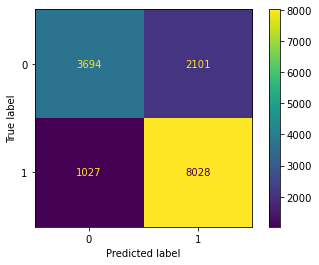

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# Hyperparameter Tuning
Now that our accuracy is a good bit higher than where we started, we can begin tuning the hyperparameters to see if we can get a better accuracy

Done with C = 100
Done with C = 125
Done with C = 150
Done with C = 175
Done with C = 200


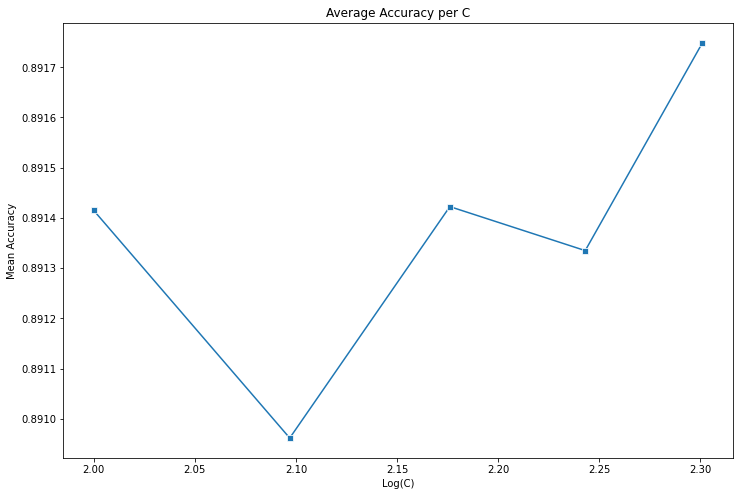

In [ ]:
C_list = [100, 125, 150, 175, 200]
cv_scores = []

for c in C_list:
    logreg = LogisticRegression(C = c, solver='liblinear', max_iter=10000)
    cv_loop_results = cross_validate(X = X_train_samp,y = y_train_samp, estimator=logreg, cv=10)
    cv_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))
    print(f"Done with C = {c}")

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = np.log10(C_list), y = cv_scores, marker = 's')
ax.set_xlabel('Log(C)')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Average Accuracy per C');


In [ ]:
print(cv_scores)
index = cv_scores.index(max(cv_scores))
print(f"A C of {C_list[index]} is the best performing c with a score of: {cv_scores[index]}")

[0.8914147875490552, 0.8909615788125876, 0.8914224780870897, 0.8913348784911811, 0.8917489514184801]
A C of 200 is the best performing c with a score of: 0.8917489514184801


With the cross validation testing finding that a c of 100 performs the best, we can put this back into our model and see if this reflects. 

In [58]:
h_model = LogisticRegression(solver='liblinear', C=200, max_iter=10000)
h_model.fit(X_train_imp, y_train)

y_htrain_pred = h_model.predict(X_train_imp)
y_hpred = h_model.predict(X_test_imp)
print(f"Train Acc: {accuracy_score(y_train, y_htrain_pred)}\nTest Acc: {accuracy_score(y_test, y_hpred)}")

Train Acc: 0.790280583613917
Test Acc: 0.7908417508417508


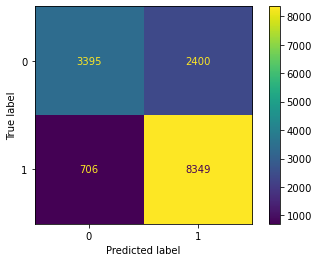

In [59]:
cm = confusion_matrix(y_test, y_hpred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

We may be approaching the limit of what can be done with a logistic regression model. We got a peak test accuracy of around 79 percent. We will now move on to our second model to see if we can improve our score

# Building a Random Forest classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_samp, y_train_samp)

train_tree_pred = clf.predict(X_train_samp)
test_tree_pred = clf.predict(X_test_imp)
print(f"Train Acc: {accuracy_score(y_train_samp, train_tree_pred)}\nTest Acc: {accuracy_score(y_test, test_tree_pred)}")

Train Acc: 0.9984738926637841
Test Acc: 0.8545454545454545


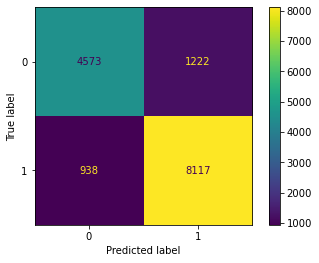

In [38]:
cm = confusion_matrix(y_test, test_tree_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

We can see that this is already considerably better than the previous logistic regression model. However, there is a fair amount of overfitting so we can now tune some hyperparameters to see if we can improve it.

# Max Tree Depth

Text(0, 0.5, 'AUC Score')

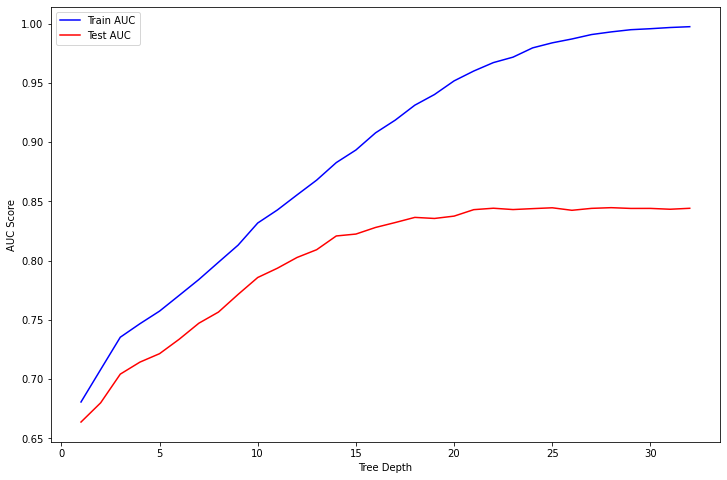

In [62]:
# Identify the optimal tree depth for given data
from sklearn.metrics import auc, roc_curve
SEED = 42
depths = np.arange(1, 33)
train_results = []
test_results = []
for depth in depths:
    dt_d = RandomForestClassifier(criterion='entropy', random_state=SEED, max_depth=depth)
    dt_d.fit(X_train_samp, y_train_samp)

    y_train_pred = dt_d.predict(X_train_samp)
    fpr, tpr, thresholds = roc_curve(y_train_samp, y_train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)

    y_test_pred = dt_d.predict(X_test_imp)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
     
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(depths, train_results, 'b', label='Train AUC')
plt.plot(depths, test_results, 'r', label='Test AUC')
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')

Best max tree depth is around 12-17

# Minimum Sample Split

Text(0, 0.5, 'AUC Score')

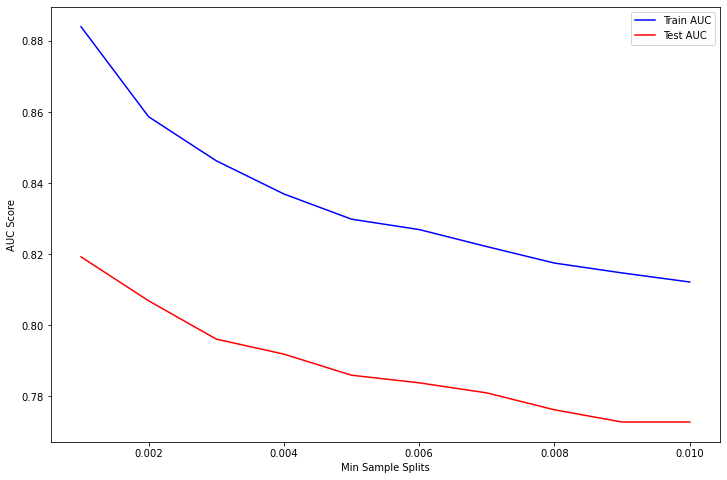

In [ ]:
# Identify the optimal min-samples-split for given data
min_sample_splits = np.linspace(0.001, 0.01, 10)
train_results = []
test_results = []
for sample in min_sample_splits:
    dt_d = RandomForestClassifier(criterion='entropy', random_state=SEED, min_samples_split=sample)
    dt_d.fit(X_train_samp, y_train_samp)

    y_train_pred = dt_d.predict(X_train_samp)
    fpr, tpr, thresholds = roc_curve(y_train_samp, y_train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)

    y_test_pred = dt_d.predict(X_test_imp)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
     
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(min_sample_splits, train_results, 'b', label='Train AUC')
plt.plot(min_sample_splits, test_results, 'r', label='Test AUC')
plt.legend()
plt.xlabel('Min Sample Splits')
plt.ylabel('AUC Score')

Best minimum sample split is around 0.1

# Minimum Sample Leafs

Text(0, 0.5, 'AUC Score')

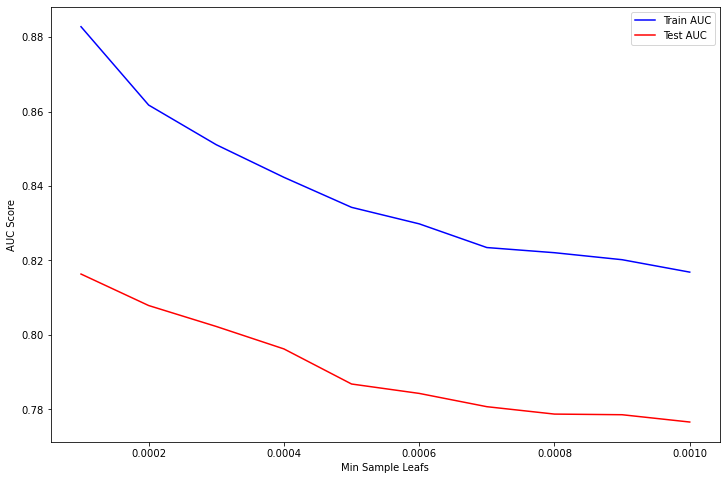

In [ ]:
# Calculate the optimal value for minimum sample leafs
min_sample_leafs = np.linspace(0.0001, 0.001, 10)
train_results = []
test_results = []
for leafs in min_sample_leafs:
    dt_d = RandomForestClassifier(criterion='entropy', random_state=SEED, min_samples_leaf=leafs)
    dt_d.fit(X_train_samp, y_train_samp)

    y_train_pred = dt_d.predict(X_train_samp)
    fpr, tpr, thresholds = roc_curve(y_train_samp, y_train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)

    y_test_pred = dt_d.predict(X_test_imp)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
     
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(min_sample_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_sample_leafs, test_results, 'r', label='Test AUC')
plt.legend()
plt.xlabel('Min Sample Leafs')
plt.ylabel('AUC Score')

The best minimum sample leaf is around 0.1

# Maximum Features

Text(0.5, 0, 'Max Features')

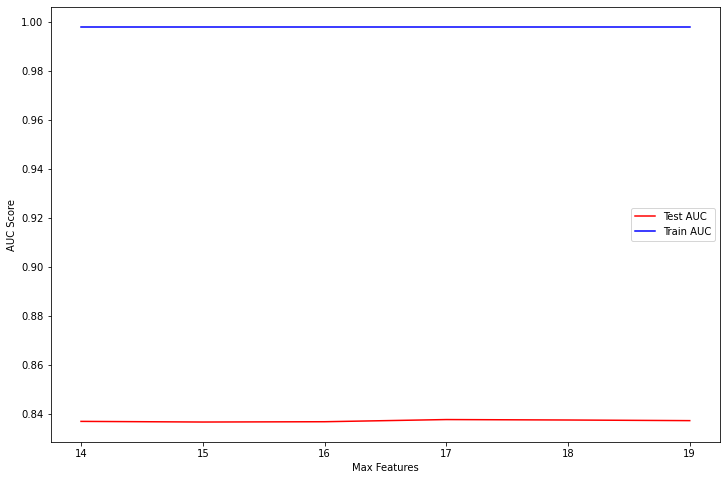

In [ ]:
# Find the best value for optimal maximum feature size
max_features = np.arange(14, 20)
test_results = []
train_results = []

for feature in max_features:
    dt = RandomForestClassifier(criterion='entropy', random_state=SEED, max_features=feature)
    dt.fit(X_train_samp, y_train_samp)

    y_train_pred = dt.predict(X_train_samp)
    fpr, tpr, thresholds = roc_curve(y_train_samp, y_train_pred)
    auc_score = auc(fpr, tpr)
    train_results.append(auc_score)

    y_test_pred = dt.predict(X_test_imp)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc_score = auc(fpr, tpr)
    test_results.append(auc_score)

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.legend()
plt.ylabel('AUC Score')
plt.xlabel('Max Features')

The best maximum features count is around 19

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, min_samples_leaf=0.001, max_depth=20, max_features=15, min_samples_split=0.001)
#clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_samp, y_train_samp)

train_tree_pred = clf.predict(X_train_samp)
test_tree_pred = clf.predict(X_test_imp)
print(f"Train Acc: {accuracy_score(y_train_samp, train_tree_pred)}\nTest Acc: {accuracy_score(y_test, test_tree_pred)}")

Train Acc: 0.8299117037898333
Test Acc: 0.8137373737373738


This is around the best we can do with train and test accuracy are more in line with eachother. We did take a hit to both training and test acc, but since they are closer together, there should be less variance when tested on other data.